# <b>Task I: Quantum Computing Part</b> 

<b>Instructions</b>
<ol>
    <li>Implement a simple quantum operation with Cirq or Pennylane</li>
        <ol type = "a">
            <li>With 5 qubits</li> 
            <li>Apply Hadamard operation on every qubit</li> 
            <li>Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)</li> 
            <li>SWAP (0, 4) </li>
            <li>Rotate X with pi/2 on any qubit </li>
            <li>Plot the circuit </li></ol>
    <li>Implement a second circuit with a framework of your choice:</li>
        <ol type = "a">
            <li>Apply a Hadmard gate to the first qubit</li>
            <li>rotate the second qubit by pi/3 around X</li>
            <li>Apply Hadamard gate to the third and fourth qubit</li>
            <li>Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4></li>

</ol>

## <b>1. Implementation of a simple quantum operation</b>

### Using Cirq

In [1]:
import cirq 
import numpy as np
from cirq.contrib.svg import SVGCircuit
print("The packages were imported successfully, you can continue.")

The packages were imported successfully, you can continue.


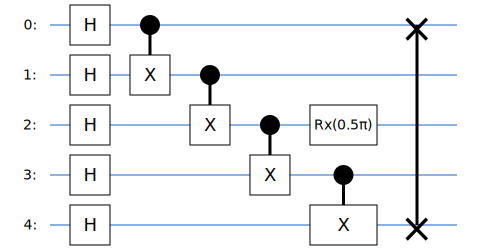

In [2]:
# Definition of 5 qubits
N_qubits = 5
qubits = [cirq.LineQubit(i) for i in range(N_qubits)]

# Creating the circuit
circuit_1 = cirq.Circuit()

# Hadamard in every qubit
circuit_1.append(cirq.H(q) for q in qubits)

# CNOT in (0,1), (1,2), (2,3), (3,4)
circuit_1.append(cirq.CNOT(qubits[i], qubits[i+1]) for i in range(N_qubits-1))

# SWAP in (0,4)
circuit_1.append(cirq.SWAP(qubits[0], qubits[4]))

# R_X with pi/2 in qubit 3
circuit_1.append(cirq.rx(np.pi / 2)(qubits[2]))

SVGCircuit(circuit_1)

In [3]:
# Visualization
print(circuit_1)

0: ───H───@──────────────────────×───
          │                      │
1: ───H───X───@──────────────────┼───
              │                  │
2: ───H───────X───@───Rx(0.5π)───┼───
                  │              │
3: ───H───────────X───@──────────┼───
                      │          │
4: ───H───────────────X──────────×───


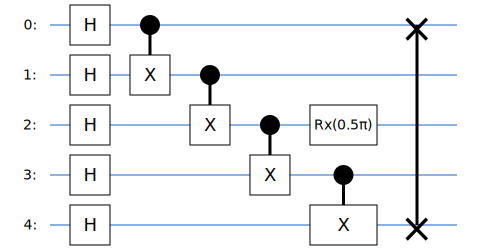

In [4]:
SVGCircuit(circuit_1)

### Using Pennylane

In [5]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np
print("The packages were imported successfully, you can continue.")

The packages were imported successfully, you can continue.


In [6]:
# Definition of 5 qubits
N_qubits = 4
dev = qml.device("default.qubit", wires=N_qubits)

@qml.qnode(dev)
# Ceating the circuit
def circuit_2():
    # Hadamard in every qubit
    for i in range(N_qubits+1):
        qml.Hadamard(wires=i)

    # CNOT in (0,1), (1,2), (2,3), (3,4)
    for i in range(N_qubits):
        qml.CNOT(wires=[i, i+1])

    # SWAP in (0,4)
    qml.SWAP(wires=[0, 4])

    # R_X with pi/2 in qubit 3
    qml.RX(np.pi /2, wires=2)

    return qml

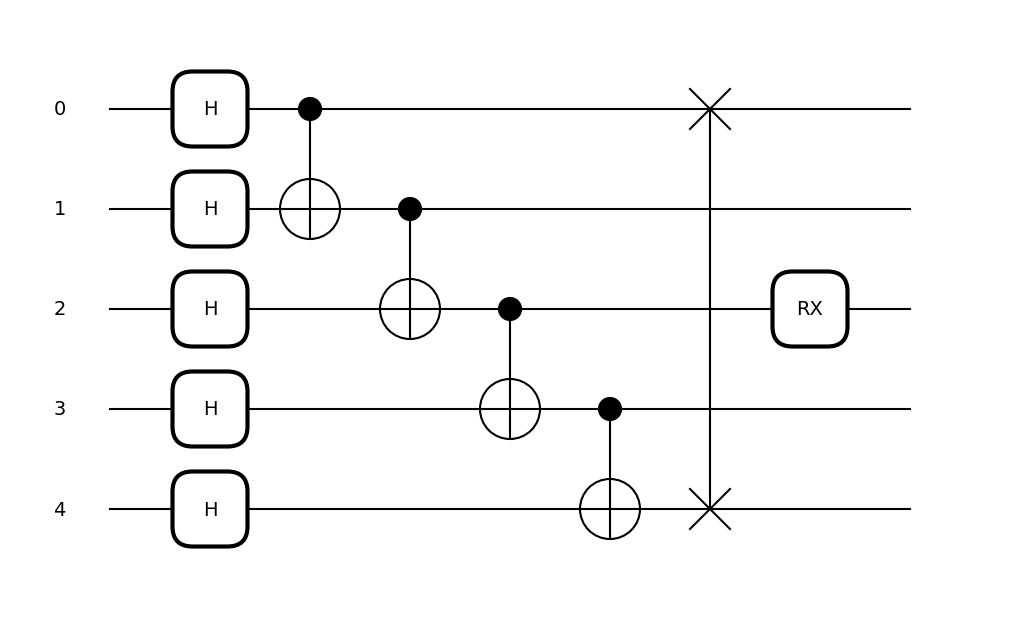

In [7]:
fig, ax = qml.draw_mpl(circuit_2)()
plt.show()

## <b>2. Implementation of a second circuit</b>

In this notebook we will implement a quantum circuit using both **PennyLane** and **Cirq**. The circuit performs the following operations:

1. Apply a Hadamard gate to the first qubit.
2. Rotate the second qubit by $\pi/3$ around the X-axis.
3. Apply a Hadamard gate to both the third and fourth qubit.
4. Perform a swap test between the states of the first two qubits $\ket{q_1 q_2}$ and the third and fourth qubits $\ket{q_3 q_4}$.

<b>The Swap Test</b>

The <i>swap test</i> is an algorithm used in quantum computing to measure the similarity (or overlap) between two quantum states. Given two states $\ket{\psi}$ and $\ket{\phi}$, the test estimates the squared inner product $|\langle \psi | \phi \rangle|^2$, which is a measure of their fidelity.

<b>Mathematical Overview</b>
Named $\ket{\phi}$ and $\ket{\psi}$ the qubits we want to runa swap test, then we follow the next steps

1. Prepare an ancilla qubit in $\ket{0}$ and apply a Hadamard gate to or circuit
\begin{equation*}
    \frac{1}{\sqrt{2}}(\ket{0\psi\phi} + \ket{1\psi\phi})
\end{equation*}

2. Perform a <b>controlled-SWAP</b> (Fredkin) gate between the two subsystems of interest, controlled by the ancilla.

3. Apply a final Hadamard gate on the ancilla and measure it.

The probability $p_0$ of the ancilla being measured in $\ket{0}$ is given by
\begin{equation*}
p_0 = \frac{1 + |\langle \psi|\phi \rangle|^2}{2}.
\end{equation*}

Thus, the squared inner product can be computed as:
\begin{equation*}
    \langle \psi|\phi \rangle|^2 = 2p_0 - 1.
\end{equation*}

This test can be used for comparing quantum states, which is useful in quantum machine learning, fingerprinting, and entanglement detection.

---

Below, we provide two implementations: one using PennyLane and another using Cirq. Each section concludes with a visualization (circuit diagram).


### Using Cirq

In [4]:
import cirq 
import numpy as np
from cirq.contrib.svg import SVGCircuit
print("The packages were imported successfully, you can continue.")

The packages were imported successfully, you can continue.


In [19]:
# Create the qubits: one ancilla and four system qubits
ancilla = cirq.NamedQubit("ancilla")
q1 = cirq.NamedQubit("q1")
q2 = cirq.NamedQubit("q2")
q3 = cirq.NamedQubit("q3")
q4 = cirq.NamedQubit("q4")

# Define the circuit
circuit_3 = cirq.Circuit()

# a) Hadamard on the first qubit (q1)
circuit_3.append(cirq.H(q1))

# b) Rotate the second qubit (q2) by pi/3 around the X-axis.
circuit_3.append(cirq.rx(np.pi/3)(q2))

# c) Hadamard on the third (q3) and fourth (q4) qubit.
circuit_3.append(cirq.H(q3))
circuit_3.append(cirq.H(q4))

#------------------------------------------------------------
# d) Swap Test - using an ancilla to control SWAP operations
#------------------------------------------------------------
# Prepare the ancilla
circuit_3.append(cirq.H(ancilla))

# Controlled-SWAP:
cswap_1 = cirq.CSWAP(ancilla, q1, q3) # firsts qubits of both states
cswap_2 = cirq.CSWAP(ancilla, q2, q4) # seconds qubits of both states
circuit_3.append(cswap_1)
circuit_3.append(cswap_2)

# Final Hadamard gate on the ancilla
circuit_3.append(cirq.H(ancilla))

# Add a measurement on the ancilla
circuit_3.append(cirq.measure(ancilla, key='ancilla'))

In [25]:
# Simulate the Cirq circuit.
simulator = cirq.Simulator()
result = simulator.run(circuit_3, repetitions=1000)
counts = result.histogram(key='ancilla')

# Calculate probability of measuring 0 on the ancilla.
p0 = counts.get(0, 0) / 1000
print("\nCirq Swap Test Results:")
print(f"Probability of measuring ancilla in state |0>: {p0:.4f}")
print(f"Estimated squared inner product: {2*p0-1:.4f}")



Cirq Swap Test Results:
Probability of measuring ancilla in state |0>: 0.7420
Estimated squared inner product: 0.4840


In [20]:
# Visualization
print(circuit_3)

ancilla: ───H────────────@───@───H───M───
                         │   │
q1: ────────H────────────×───┼───────────
                         │   │
q2: ────────Rx(0.333π)───┼───×───────────
                         │   │
q3: ────────H────────────×───┼───────────
                             │
q4: ────────H────────────────×───────────


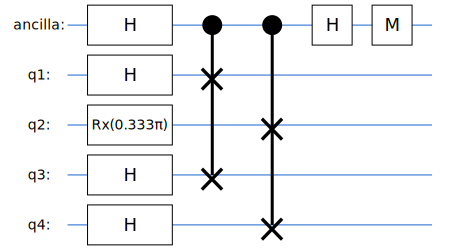

In [21]:
SVGCircuit(circuit_3)

### Using Pennylane

In [18]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np
print("The packages were imported successfully, you can continue.")

The packages were imported successfully, you can continue.


In [22]:
# Definition of 5 qubits
N_qubits = 5
dev = qml.device("default.qubit", wires=N_qubits)

@qml.qnode(dev, interface = 'autograd')
def circuit_4():
    # Wire labels
    ancilla = 0
    q1, q2, q3, q4 = 1, 2, 3, 4

    # a) Apply a Hadamard gate to the first qubit (q1)
    qml.Hadamard(wires=q1)

    # b) Rotate the second qubit (q2) by pi/3 around the X-axis.
    qml.RX(np.pi/3, wires=q2)

    # c) Apply a Hadamard gate to the third (q3) and fourth (q4) qubit.
    qml.Hadamard(wires=q3)
    qml.Hadamard(wires=q4)
    
    # d) Perform the Swap Test between the two pairs |q1 q2> and |q3 q4>
    # Prepare the ancilla qubit.
    qml.Hadamard(wires=ancilla)
    # Controlled swap of the first two qubits with the second two.
    qml.ctrl(qml.SWAP, control=ancilla)(wires=[q1, q3])
    qml.ctrl(qml.SWAP, control=ancilla)(wires=[q2, q4])
    qml.Hadamard(wires=ancilla)

    return qml.probs(ancilla)

In [2]:
# Number of qubits: 5 (1 ancilla + 4 system qubits)
dev = qml.device("default.qubit", wires=5)

@qml.qnode(dev, interface="autograd")
def circuit_4():
    # Wire labels
    ancilla = 0
    q1, q2, q3, q4 = 1, 2, 3, 4

    # Step a) Hadamard on q1
    qml.Hadamard(wires=q1)

    # Step b) Rotation around X by pi/3 on q2
    qml.RX(np.pi / 3, wires=q2)

    # Step c) Hadamard on q3 and q4
    qml.Hadamard(wires=q3)
    qml.Hadamard(wires=q4)

    # Step d) Swap Test between |q1 q2> and |q3 q4>
    qml.Hadamard(wires=ancilla)

    # Controlled swap of q1 <-> q3 and q2 <-> q4
    qml.ctrl(qml.SWAP, control=ancilla)(wires=[q1, q3])
    qml.ctrl(qml.SWAP, control=ancilla)(wires=[q2, q4])

    qml.Hadamard(wires=ancilla)

    return qml.probs(wires=ancilla)

In [23]:
probs_4 = circuit_4()
print(f"Probability of measuring ancilla in state 0: {probs_4[0]:.4f}")
print(f"Estimated squared inner product: {2 * probs_4[0] - 1:.4f}")

Probability of measuring ancilla in state 0: 0.7500
Estimated squared inner product: 0.5000


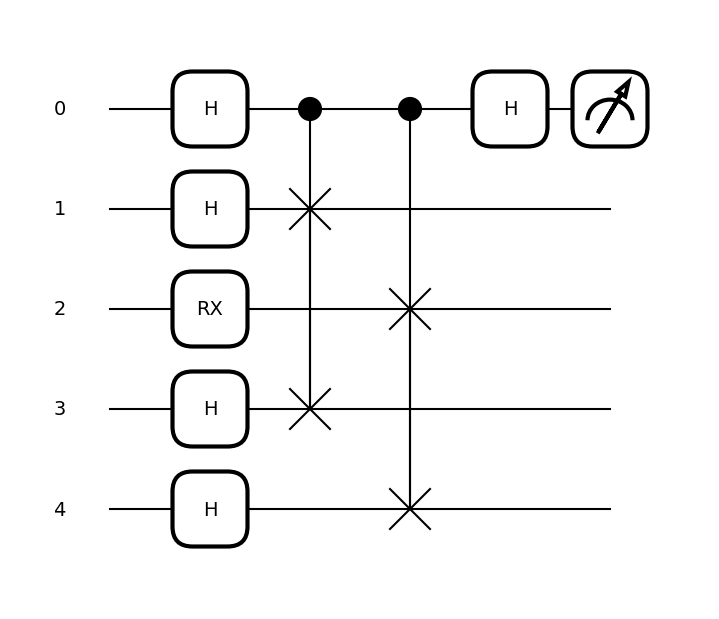

In [24]:
fig_2, ax_2 = qml.draw_mpl(circuit_4)()
plt.show()